In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import sklearn

In [ ]:
cnbc = pd.read_csv('cnbc_headlines.csv')

In [ ]:
cnbc.head()


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
cnbc.shape


(3080, 3)

In [ ]:
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [ ]:
cnbc.dropna(inplace=True)

In [ ]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [ ]:
cnbc.reset_index(inplace=True,drop=True)

In [ ]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [ ]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
dup_list = list(cnbc.duplicated(keep='first').values)
dup_list.count(True)

0

In [ ]:
cnbc.shape


(2800, 3)

In [ ]:
reuters = pd.read_csv("/content/reuters_headlines.csv")

In [ ]:
reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
reuters.drop_duplicates(keep='first', inplace=True)
reuters
reuters.reset_index(drop=True, inplace=True)

In [ ]:
def preprocessing_text(data):

    #convert all to lowercase
    data = data.lower()


    #removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #remove stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]


    #stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    #lemmitizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)


In [ ]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):

    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))

    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])

    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)

    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)

    return df

In [ ]:
cnbc_reuters = pd.concat([cnbc, reuters], axis=0)

In [ ]:
cnbc_reu = cnbc_reuters.copy()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

cnbc_reu['Desciption'] = cnbc_reu['Description'].apply(preprocessing_text)
cnbc_reu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Headlines,Time,Description,Desciption
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",look stock highqual compani go lower even thou...
...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,malaysian govern rule parti tuesday deni ever ...
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,german prosecutor said tuesday search volkswag...
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,mcdonald corp tuesday announc approv scienc ba...
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,pratt whitney soon begin deliveri spare engin ...


In [ ]:
f = sentiment_analysis(cnbc_reu,'Description')
df

,Headlines,Time,Description,Desciption,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",look stock highqual compani go lower even thou...,Negative
...,...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,malaysian govern rule parti tuesday deni ever ...,Negative
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,german prosecutor said tuesday search volkswag...,Positive
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,mcdonald corp tuesday announc approv scienc ba...,Negative
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,pratt whitney soon begin deliveri spare engin ...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

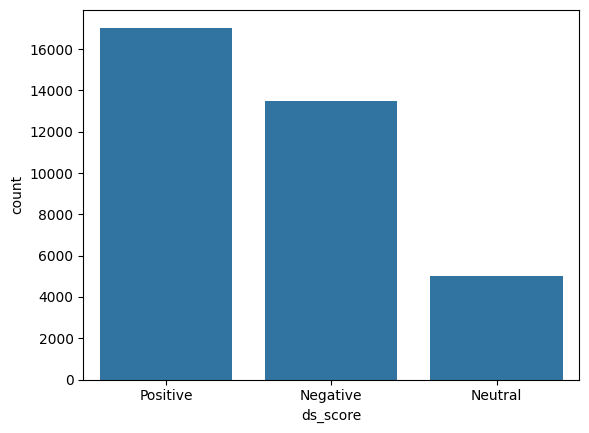

In [ ]:
sns.countplot(x='ds_score',data=df)



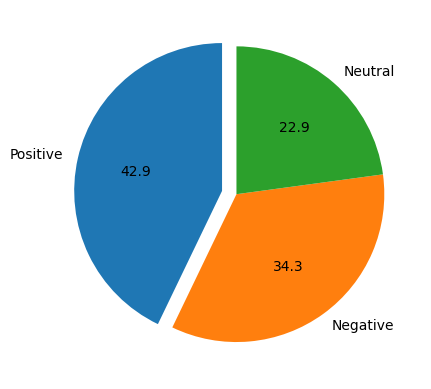

In [ ]:
plt.pie([15000, 12000, 8000], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape,

(31963,) (3552,) (31963,) (3552,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.8265765765765766
Confusion matrix:  [[1164   53  163]
 [  79  279  125]
 [ 143   53 1493]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1380
     Neutral       0.72      0.58      0.64       483
    Positive       0.84      0.88      0.86      1689

    accuracy                           0.83      3552
   macro avg       0.80      0.77      0.78      3552
weighted avg       0.82      0.83      0.82      3552



In [ ]:
%%time

#  Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LOGISTIC REGRESSION
accuarcy score:  0.7978603603603603
Confusion matrix:  [[1126   32  222]
 [  91  208  184]
 [ 161   28 1500]]
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82      1380
     Neutral       0.78      0.43      0.55       483
    Positive       0.79      0.89      0.83      1689

    accuracy                           0.80      3552
   macro avg       0.79      0.71      0.73      3552
weighted avg       0.80      0.80      0.79      3552

CPU times: user 7.98 s, sys: 5.67 s, total: 13.6 s
Wall time: 15.3 s


In [ ]:

%%time
# BernoulliNB

from sklearn.naive_bayes import BernoulliNB


# Fit the pipeline to the data
bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_ds.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7074887387387387
Confusion matrix:  [[1005   58  317]
 [  92  184  207]
 [ 294   71 1324]]
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73      1380
     Neutral       0.59      0.38      0.46       483
    Positive       0.72      0.78      0.75      1689

    accuracy                           0.71      3552
   macro avg       0.68      0.63      0.65      3552
weighted avg       0.70      0.71      0.70      3552

CPU times: user 1.42 s, sys: 1.19 ms, total: 1.42 s
Wall time: 1.43 s


In [ ]:
def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):

    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names

    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]

    return metrics_df

In [ ]:
#pipeline creation #1. Count Vectorizer

#2. TfidTransformer

#3. MultinomialNB

from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

#Fit the pipeline to the data

multi_nb_ds = Pipeline([("count vec", CountVectorizer()), ('tfidf', TfidfTransformer()),

("multi_nb", MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

#predict on test dataset pred multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")

#print accuracy score

print("accuarcy score:", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix:", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score: 0.7074887387387387
Confusion matrix: [[1005   58  317]
 [  92  184  207]
 [ 294   71 1324]]
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73      1380
     Neutral       0.59      0.38      0.46       483
    Positive       0.72      0.78      0.75      1689

    accuracy                           0.71      3552
   macro avg       0.68      0.63      0.65      3552
weighted avg       0.70      0.71      0.70      3552

